<a href="https://colab.research.google.com/github/tomthomas/FPL-Scrape/blob/main/FPL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np

#### Get URL

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

#### GET Request

In [3]:
r = requests.get(url)

#### Convert to JSON Object

In [4]:
json = r.json()

#### Look at JSON Keys

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

#### Focus on 3 keys - elements, element_types, teams

### Create dataframes

In [6]:
elements_df           = pd.DataFrame(json['elements'])
element_types_df      = pd.DataFrame(json['element_types'])
teams_df              = pd.DataFrame(json['teams'])
events_df             = pd.DataFrame(json['events'])
element_stats_df      = pd.DataFrame(json['element_stats'])

#### Preview Head

In [7]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,68,37605.jpg,0.0,Özil,0.5,False,None,n,1,3,0,3429,14,53286,272,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,628,250,628,250,628,250,628,250,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,n,1,3,0,10262,4,18898,46,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,584,215,574,215,566,212,586,215,NaN,,NaN,,NaN,
2,100.0,75.0,41270,0,0,-1,1,0,2,0.8,1.0,0,David,0.3,3,False,,2020-12-26T18:00:15.638627Z,54,41270.jpg,1.1,Luiz Moreira Marinho,0.7,False,None,a,1,3,9,40599,1485,91201,1330,0.1,1.7,David Luiz,479,0,0,0,9,0,0,0,0,0,0,0,70,99.4,25.8,40.0,16.5,263,100,299,94,268,83,302,99,NaN,,4.0,,NaN,
3,100.0,100.0,54694,-1,1,-7,7,1,3,3.2,3.7,3,Pierre-Emerick,2.7,4,False,,2020-12-19T20:30:20.434896Z,113,54694.jpg,3.5,Aubameyang,7.3,False,None,a,1,3,53,518408,9923,3171597,21974,0.2,4.7,Aubameyang,1346,3,1,5,16,1,0,0,2,0,0,4,154,198.8,214.3,433.0,84.6,148,56,62,42,25,14,39,25,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.7,1.2,0,Cédric,0.2,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,1.0,Soares,0.2,False,None,a,1,3,1,4175,232,35007,349,0.0,0.2,Cédric,5,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,571,211,559,212,547,207,574,212,NaN,,NaN,,NaN,


In [8]:
element_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],73
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],224
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],250
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],81


In [9]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1150,1160,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,3,None,False,0,1080,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,2,None,False,0,1050,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,4,None,False,0,1260,1280,1240,1280,1270,1310,4


In [10]:
events_df.head()

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2020-09-12T10:00:00Z,50,True,True,4761681.0,1599904800,0,142.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 112843}...",259.0,12.0,254.0,"{'id': 254, 'points': 20}",0,4.0,4.0
1,2,Gameweek 2,2020-09-19T10:00:00Z,59,True,True,6234344.0,1600509600,0,165.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 94615},...",259.0,302.0,390.0,"{'id': 390, 'points': 24}",14637421,4.0,254.0
2,3,Gameweek 3,2020-09-26T10:00:00Z,43,True,True,6223553.0,1601114400,0,119.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 86797},...",259.0,164.0,224.0,"{'id': 224, 'points': 17}",20387878,272.0,254.0
3,4,Gameweek 4,2020-10-03T10:00:00Z,48,True,True,6563000.0,1601719200,0,160.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 82267},...",272.0,164.0,37.0,"{'id': 37, 'points': 24}",14570655,254.0,272.0
4,5,Gameweek 5,2020-10-17T10:00:00Z,60,True,True,7124486.0,1602928800,0,136.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 80554},...",164.0,390.0,117.0,"{'id': 117, 'points': 16}",18391649,390.0,254.0


In [41]:
element_stats_df.columns

Index(['label', 'name'], dtype='object')

#### Preview Columns

In [42]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [13]:
element_types_df.columns

Index(['id', 'plural_name', 'plural_name_short', 'singular_name',
       'singular_name_short', 'squad_select', 'squad_min_play',
       'squad_max_play', 'ui_shirt_specific', 'sub_positions_locked',
       'element_count'],
      dtype='object')

In [14]:
events_df.columns

Index(['id', 'name', 'deadline_time', 'average_entry_score', 'finished',
       'data_checked', 'highest_scoring_entry', 'deadline_time_epoch',
       'deadline_time_game_offset', 'highest_score', 'is_previous',
       'is_current', 'is_next', 'chip_plays', 'most_selected',
       'most_transferred_in', 'top_element', 'top_element_info',
       'transfers_made', 'most_captained', 'most_vice_captained'],
      dtype='object')

In [15]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

#### Filter smaller dataframe

In [160]:
filter_elements_df = elements_df [['second_name','first_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points','form']]

In [60]:
filter_elements_df.head()

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name
0,1,3,0.5,68,0,3429,0.0,0,0.0,Mesut Özil
1,1,2,0.1,48,0,10262,0.0,0,0.0,Sokratis Papastathopoulos
2,1,2,0.7,54,479,40599,1.7,9,0.3,David Luiz Moreira Marinho
3,1,3,7.3,113,1346,518408,4.7,53,2.7,Pierre-Emerick Aubameyang
4,1,2,0.2,46,5,4175,0.2,1,0.2,Cédric Soares


In [163]:
filter_elements_df['name'] = filter_elements_df[['first_name','second_name']].apply(lambda x: ' '.join(x), axis=1)
filter_elements_df.pop('first_name')

KeyError: ignored

In [164]:
filter_elements_df.pop('second_name')

0                      Özil
1          Papastathopoulos
2      Luiz Moreira Marinho
3                Aubameyang
4                    Soares
               ...         
623                  Cundle
624                Richards
625                 Marques
626             Söndergaard
627                 Cutrone
Name: second_name, Length: 628, dtype: object

## Dataframe Sorting

### Map()

#### Similar to V-lookup

#### Map filter_elements_df to element_type_df (NOT element_type under elements_df)

In [165]:
filter_elements_df['position'] = filter_elements_df.element_type.map(element_types_df.set_index('id').singular_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
filter_elements_df.head()

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position
0,1,3,0.5,68,0,3429,0.0,0,0.0,Mesut Özil,Midfielder
1,1,2,0.1,48,0,10262,0.0,0,0.0,Sokratis Papastathopoulos,Defender
2,1,2,0.7,54,479,40599,1.7,9,0.3,David Luiz Moreira Marinho,Defender
3,1,3,7.3,113,1346,518408,4.7,53,2.7,Pierre-Emerick Aubameyang,Midfielder
4,1,2,0.2,46,5,4175,0.2,1,0.2,Cédric Soares,Defender


#### We^ organized Name by position i think

In [166]:
filter_elements_df['team'] = filter_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Adding Team name

In [65]:
filter_elements_df.head()

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position
0,Arsenal,3,0.5,68,0,3429,0.0,0,0.0,Mesut Özil,Midfielder
1,Arsenal,2,0.1,48,0,10262,0.0,0,0.0,Sokratis Papastathopoulos,Defender
2,Arsenal,2,0.7,54,479,40599,1.7,9,0.3,David Luiz Moreira Marinho,Defender
3,Arsenal,3,7.3,113,1346,518408,4.7,53,2.7,Pierre-Emerick Aubameyang,Midfielder
4,Arsenal,2,0.2,46,5,4175,0.2,1,0.2,Cédric Soares,Defender


#### Sort by value_season

#### Helps us see the top value picks of the year

#### value_season has string values

#### To avoid data conflict, we need to create a new column called value. 
#### astype() helps convert values to float

In [167]:
filter_elements_df['value'] = filter_elements_df.value_season.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


sort_values() helps you sort data

#### Default is ascending direction from low to high. For descending, set to False.

In [68]:
filter_elements_df.sort_values('value',ascending=False).head(10)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
33,Aston Villa,1,26.9,51,1350,2588213,16.3,83,6.0,Emiliano Martínez,Goalkeeper,16.3
487,Southampton,2,10.6,49,1440,1081109,16.1,79,6.3,Jan Bednarek,Defender,16.1
288,Leeds,4,39.2,66,1456,4750606,15.3,101,5.2,Patrick Bamford,Forward,15.3
299,Leeds,1,5.4,46,1530,636204,15.2,70,4.2,Illan Meslier,Goalkeeper,15.2
475,Southampton,1,16.7,47,1440,1111318,15.1,71,4.5,Alex McCarthy,Goalkeeper,15.1
286,Leeds,2,11.5,48,1520,1330277,14.8,71,6.2,Stuart Dallas,Defender,14.8
584,West Ham,3,10.1,52,1530,1213672,14.8,77,5.6,Tomas Soucek,Midfielder,14.8
486,Southampton,2,11.5,48,1530,1035451,14.4,69,4.8,Kyle Walker-Peters,Defender,14.4
571,West Ham,2,11.5,54,1530,1440472,14.3,77,4.8,Aaron Cresswell,Defender,14.3
567,West Ham,1,3.4,51,1440,404485,13.9,71,2.6,Lukasz Fabianski,Goalkeeper,13.9


#### Value season = total points / now cost

### Using Pivot_table()

#### Using pivot on column position -> value by position

In [69]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [70]:
pivot.sort_values('value',ascending = False)

,position,value
0,Defender,3.985714
3,Midfielder,3.910800
1,Forward,3.774074
2,Goalkeeper,3.309589


#### This result maybe skewed by players who play less minutes

#### Let's remove 0 minute players

### Using .loc[ ]

#### .loc helps you locate specifc rows/columns

In [71]:
filter_elements_df = filter_elements_df.loc[filter_elements_df.value > 0 ]

In [72]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [73]:
pivot.sort_values('value',ascending = False)

,position,value
2,Goalkeeper,7.793548
0,Defender,5.346108
3,Midfielder,5.065803
1,Forward,4.930645


#### Which Teams are providing the most value this year?

In [74]:
team_pivot = filter_elements_df.pivot_table(index = 'team', values ='value', aggfunc = np.mean).reset_index()

In [75]:
team_pivot.sort_values('value', ascending = False)

,team,value
8,Leeds,7.794737
1,Aston Villa,7.636842
15,Southampton,7.045455
18,West Ham,6.631818
19,Wolves,5.814286
5,Crystal Palace,5.619048
16,Spurs,5.600000
3,Burnley,5.550000
4,Chelsea,5.512500
2,Brighton,5.173913


####

### Using .hist()

#### Histogram distribution of each value by position

#### Filter more dataframes

In [144]:
fwd_df = filter_elements_df.loc[filter_elements_df.position == 'Forward']
mid_df = filter_elements_df.loc[filter_elements_df.position == 'Midfielder']
def_df = filter_elements_df.loc[filter_elements_df.position == 'Defender']
gk_df = filter_elements_df.loc[filter_elements_df.position == 'Goalkeeper']

In [ ]:
filter_elements_df['form'] = filter_elements_df.form.astype(float)

In [146]:
mid_filter_df = mid_df.loc[mid_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 
def_filter_df = def_df.loc[def_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 
gk_filter_df = gk_df.loc[gk_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

In [156]:
cheap_filter_df = filter_elements_df.loc[filter_elements_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

In [114]:
fwd_filter_df = fwd_df.loc[fwd_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

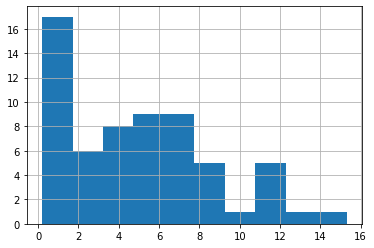

In [77]:
fwd_df.value.hist()

In [85]:
fwd_df.sort_values('form', ascending = False).head(10) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
258,Leicester,4,22.5,102,1299,2908094,11.0,112,6.3,Jamie Vardy,Forward,11.0
389,Man Utd,4,7.2,88,823,826902,4.9,43,6.2,Anthony Martial,Forward,4.9
319,Liverpool,4,3.7,93,1393,420645,7.5,70,5.5,Roberto Firmino,Forward,7.5
507,Spurs,4,48.6,110,1429,3749735,11.4,125,5.4,Harry Kane,Forward,11.4
288,Leeds,4,39.2,66,1456,4750606,15.3,101,5.2,Patrick Bamford,Forward,15.3
303,Leeds,4,2.8,57,814,265745,8.4,48,5.0,Rodrigo Moreno,Forward,8.4
5,Arsenal,4,10.3,83,861,584956,7.0,58,4.8,Alexandre Lacazette,Forward,7.0
446,Sheffield Utd,4,2.6,52,921,206149,9.2,48,4.0,David McGoldrick,Forward,9.2
143,Chelsea,4,2.7,72,777,327076,8.3,60,4.0,Tammy Abraham,Forward,8.3
61,Aston Villa,4,7.5,61,1350,1432656,11.3,69,3.6,Ollie Watkins,Forward,11.3


In [ ]:
fwd_filter_df['form'] = fwd_filter_df.form.astype(float)

In [128]:
fwd_filter_df = fwd_filter_df.loc[fwd_filter_df.realvalue < 50 ]
fwd_filter_df = fwd_filter_df.loc[fwd_filter_df.minutes > 500 ]

In [ ]:
fwd_filter_df.pop('realvalue1')


In [139]:
fwd_filter_df['realvalue'] = (fwd_filter_df['form'] / fwd_filter_df['value'])*fwd_filter_df['total_points']

In [ ]:
mid_filter_df['realvalue'] = (mid_filter_df['form'] / mid_filter_df['value'])*mid_filter_df['total_points']
def_filter_df['realvalue'] = (def_filter_df['form'] / def_filter_df['value'])*def_filter_df['total_points']
gk_filter_df['realvalue'] = (gk_filter_df['form'] / gk_filter_df['value'])*gk_filter_df['total_points']

In [149]:
mid_filter_df = mid_filter_df.loc[mid_filter_df.minutes > 500 ]
def_filter_df = def_filter_df.loc[def_filter_df.minutes > 500 ]
gk_filter_df = gk_filter_df.loc[gk_filter_df.minutes > 500 ]

In [141]:
fwd_filter_df.sort_values('form', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
389,Man Utd,4,7.2,88,823,826902,4.9,43,6.2,Anthony Martial,Forward,4.9,54.408163
507,Spurs,4,48.6,110,1429,3749735,11.4,125,5.4,Harry Kane,Forward,11.4,59.210526
5,Arsenal,4,10.3,83,861,584956,7.0,58,4.8,Alexandre Lacazette,Forward,7.0,39.771429
446,Sheffield Utd,4,2.6,52,921,206149,9.2,48,4.0,David McGoldrick,Forward,9.2,20.869565
439,Newcastle,4,23.9,66,1237,2708938,13.0,86,3.6,Callum Wilson,Forward,13.0,23.815385
227,Fulham,4,0.8,53,926,118139,8.3,44,3.5,Bobby Decordova-Reid,Forward,8.3,18.554217
109,Burnley,4,1.8,62,1289,208093,7.6,47,3.4,Chris Wood,Forward,7.6,21.026316
77,Brighton,4,2.3,61,1116,673988,9.7,59,3.2,Neal Maupay,Forward,9.7,19.463918
613,Wolves,4,1.6,52,521,118109,4.0,21,2.6,Fabio Silva,Forward,4.0,13.650000
105,Burnley,4,0.3,60,781,28653,4.2,25,2.6,Ashley Barnes,Forward,4.2,15.476190


In [151]:
mid_filter_df.sort_values('realvalue', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
388,Man Utd,3,54.7,113,1299,4267592,11.5,130,9.4,Bruno Miguel Borges Fernandes,Midfielder,11.5,106.260870
352,Man City,3,4.7,114,1179,964705,6.7,76,6.5,Raheem Sterling,Midfielder,6.7,73.731343
348,Man City,3,31.7,118,1187,3479162,6.9,81,6.2,Kevin De Bruyne,Midfielder,6.9,72.782609
509,Spurs,3,64.9,98,1346,5790833,13.5,132,6.4,Heung-Min Son,Midfielder,13.5,62.577778
392,Man Utd,3,14.5,96,1363,1584467,8.8,84,6.4,Marcus Rashford,Midfielder,8.8,61.090909
347,Man City,3,3.0,54,734,159141,8.3,45,8.2,Ilkay Gündogan,Midfielder,8.3,44.457831
3,Arsenal,3,7.3,113,1346,518408,4.7,53,2.7,Pierre-Emerick Aubameyang,Midfielder,4.7,30.446809
610,Wolves,3,17.3,60,1351,1687928,13.3,80,5.0,Pedro Lomba Neto,Midfielder,13.3,30.075188
22,Arsenal,3,13.4,53,1233,735193,10.6,56,5.5,Bukayo Saka,Midfielder,10.6,29.056604
360,Man City,3,5.9,62,587,1066954,7.7,48,4.2,Phil Foden,Midfielder,7.7,26.181818


In [153]:
def_filter_df.sort_values('realvalue', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
106,Burnley,2,1.8,49,810,152597,9.8,48,6.4,Ben Mee,Defender,9.8,31.346939
15,Arsenal,2,14.8,54,1430,551933,10.9,59,5.3,Kieran Tierney,Defender,10.9,28.688073
248,Fulham,2,0.4,45,990,33522,8.4,38,6.0,Tosin Adarabioyo,Defender,8.4,27.142857
353,Man City,2,14.8,58,990,1023984,9.5,55,4.5,João Pedro Cavaco Cancelo,Defender,9.5,26.052632
99,Burnley,2,2.4,53,1170,96500,8.7,46,4.6,James Tarkowski,Defender,8.7,24.321839
369,Man City,2,10.8,58,1149,839423,9.0,52,4.2,Rúben Santos Gato Alves Dias,Defender,9.0,24.266667
598,Wolves,2,12.9,51,1057,2081544,12.2,62,4.4,Romain Saïss,Defender,12.2,22.360656
110,Burnley,2,1.4,44,990,135909,8.9,39,4.6,Matthew Lowton,Defender,8.9,20.157303
71,Brighton,2,2.6,48,1260,109329,7.3,35,4.2,Lewis Dunk,Defender,7.3,20.136986
349,Man City,2,8.7,50,630,553252,7.6,38,4.0,John Stones,Defender,7.6,20.000000


In [155]:
gk_filter_df.sort_values('realvalue', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
114,Burnley,1,10.2,54,1260,374548,13.9,75,6.6,Nick Pope,Goalkeeper,13.9,35.611511
242,Fulham,1,2.1,45,1260,155763,11.1,50,5.8,Alphonse Areola,Goalkeeper,11.1,26.126126
502,Spurs,1,9.3,56,1440,529395,13.0,73,4.0,Hugo Lloris,Goalkeeper,13.0,22.461538
7,Arsenal,1,11.0,49,1530,641670,13.7,67,4.3,Bernd Leno,Goalkeeper,13.7,21.029197
354,Man City,1,5.7,60,1260,347625,9.5,57,3.5,Ederson Santana de Moraes,Goalkeeper,9.5,21.000000
160,Crystal Palace,1,3.3,48,1530,384792,10.8,52,3.8,Vicente Guaita,Goalkeeper,10.8,18.296296
377,Man Utd,1,5.9,53,1215,223154,7.9,42,3.0,David de Gea,Goalkeeper,7.9,15.949367
416,Newcastle,1,5.7,50,1440,285256,12.2,61,3.0,Karl Darlow,Goalkeeper,12.2,15.000000
95,Brighton,1,1.0,44,540,70564,3.6,16,2.5,Robert Sánchez,Goalkeeper,3.6,11.111111
464,Sheffield Utd,1,2.4,47,1530,80409,7.9,37,1.8,Aaron Ramsdale,Goalkeeper,7.9,8.430380


In [188]:
player_stack = pd.concat([fwd_filter_df, mid_filter_df, def_filter_df,gk_filter_df], axis=0)

In [190]:
player_stack.sort_values('realvalue',ascending = False).head(20)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
388,Man Utd,3,54.7,113,1299,4267592,11.5,130,9.4,Bruno Miguel Borges Fernandes,Midfielder,11.5,106.260870
352,Man City,3,4.7,114,1179,964705,6.7,76,6.5,Raheem Sterling,Midfielder,6.7,73.731343
348,Man City,3,31.7,118,1187,3479162,6.9,81,6.2,Kevin De Bruyne,Midfielder,6.9,72.782609
509,Spurs,3,64.9,98,1346,5790833,13.5,132,6.4,Heung-Min Son,Midfielder,13.5,62.577778
392,Man Utd,3,14.5,96,1363,1584467,8.8,84,6.4,Marcus Rashford,Midfielder,8.8,61.090909
507,Spurs,4,48.6,110,1429,3749735,11.4,125,5.4,Harry Kane,Forward,11.4,59.210526
389,Man Utd,4,7.2,88,823,826902,4.9,43,6.2,Anthony Martial,Forward,4.9,54.408163
347,Man City,3,3.0,54,734,159141,8.3,45,8.2,Ilkay Gündogan,Midfielder,8.3,44.457831
5,Arsenal,4,10.3,83,861,584956,7.0,58,4.8,Alexandre Lacazette,Forward,7.0,39.771429
114,Burnley,1,10.2,54,1260,374548,13.9,75,6.6,Nick Pope,Goalkeeper,13.9,35.611511


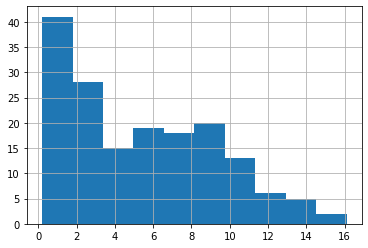

In [34]:
def_df.value.hist()

In [35]:
def_df.sort_values('value',ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
487,Bednarek,Southampton,2,10.6,49,1440,1081109,16.1,79,6.3,Defender,16.1
286,Dallas,Leeds,2,11.5,48,1520,1330277,14.8,71,6.2,Defender,14.8
486,Walker-Peters,Southampton,2,11.5,48,1530,1035451,14.4,69,4.8,Defender,14.4
571,Cresswell,West Ham,2,11.5,54,1530,1440472,14.3,77,4.8,Defender,14.3
136,Zouma,Chelsea,2,19.0,58,1350,2359092,13.4,78,1.8,Defender,13.4
568,Ogbonna,West Ham,2,2.2,50,1502,251389,13.2,66,3.4,Defender,13.2
481,Vestergaard,Southampton,2,4.4,48,1125,1395711,13.1,63,1.8,Defender,13.1
48,Targett,Aston Villa,2,4.1,46,1350,536573,12.2,56,4.2,Defender,12.2
272,Justin,Leicester,2,19.4,50,1530,2137247,12.2,61,4.0,Defender,12.2
598,Saïss,Wolves,2,12.9,51,1057,2081544,12.2,62,4.4,Defender,12.2


In [36]:
mid_df.sort_values('value',ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
584,Soucek,West Ham,3,10.1,52,1530,1213672,14.8,77,5.6,Midfielder,14.8
509,Son,Spurs,3,64.9,98,1346,5790833,13.5,132,6.4,Midfielder,13.5
610,Lomba Neto,Wolves,3,17.3,60,1351,1687928,13.3,80,5.0,Midfielder,13.3
482,Ward-Prowse,Southampton,3,11.3,62,1530,1911904,12.7,79,3.0,Midfielder,12.7
43,Grealish,Aston Villa,3,33.7,77,1350,4271910,12.6,97,4.8,Midfielder,12.6
289,Harrison,Leeds,3,2.2,54,1309,467602,12.4,67,5.4,Midfielder,12.4
173,Zaha,Crystal Palace,3,20.5,74,1340,3685932,12.0,89,2.8,Midfielder,12.0
284,Klich,Leeds,3,4.5,55,1401,1046034,12.0,66,2.8,Midfielder,12.0
388,Borges Fernandes,Man Utd,3,54.7,113,1299,4267592,11.5,130,9.4,Midfielder,11.5
74,March,Brighton,3,1.4,50,1312,269636,11.2,56,2.8,Midfielder,11.2


In [186]:
cheap_df = filter_elements_df.loc[filter_elements_df.position != ('Defender' or 'Goalkeeper')]

In [ ]:
cheap_df = cheap_df[(cheap_df['position'] = 'Midfielder','Forward')

In [187]:
cheap_df.sort_values('now_cost',ascending = True).head(10)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
294,Leeds,1,1.1,40,0,22692,0.0,0,0.0,Kamil Miazek,Goalkeeper,0.0
185,Crystal Palace,1,0.8,40,0,49629,0.0,0,0.0,Stephen Henderson,Goalkeeper,0.0
533,West Brom,1,4.2,40,0,166620,0.0,0,0.0,David Button,Goalkeeper,0.0
626,Wolves,1,0.5,40,0,7034,0.0,0,0.0,Andreas Söndergaard,Goalkeeper,0.0
443,Newcastle,1,0.2,40,0,6360,0.0,0,0.0,Daniel Langley,Goalkeeper,0.0
371,Man City,1,0.0,40,0,2994,0.0,0,0.0,Scott Carson,Goalkeeper,0.0
304,Leeds,1,0.3,40,0,31536,0.0,0,0.0,Elia Caprile,Goalkeeper,0.0
469,Sheffield Utd,1,0.6,40,0,34796,0.0,0,0.0,Michael Verrips,Goalkeeper,0.0
410,Man Utd,1,0.1,40,0,6100,0.0,0,0.0,Lee Grant,Goalkeeper,0.0
38,Aston Villa,1,4.8,40,0,231505,0.0,0,0.0,Jed Steer,Goalkeeper,0.0


In [168]:
filter_elements_df.sort_values('now_cost',ascending = True).head(10)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
282,Leeds,2,5.1,38,0,240535,0.0,0,0.0,Barry Douglas,Defender,0.0
604,Wolves,2,2.8,39,22,241394,0.3,1,0.0,Oskar Buur,Defender,0.3
84,Brighton,2,7.8,39,115,300849,0.8,3,0.3,Bernardo Fernandes da Silva Junior,Defender,0.8
470,Sheffield Utd,2,0.5,39,152,32243,0.8,3,0.0,Kean Bryan,Defender,0.8
491,Southampton,2,1.6,39,0,53130,0.0,0,0.0,Jake Vokins,Defender,0.0
528,Spurs,2,0.3,39,0,18328,0.0,0,0.0,Cameron Carter-Vickers,Defender,0.0
112,Burnley,2,0.1,39,0,6026,0.0,0,0.0,Ben Gibson,Defender,0.0
433,Newcastle,2,0.2,39,0,7755,0.0,0,0.0,Kelland Watts,Defender,0.0
333,Liverpool,2,4.3,39,171,371319,2.1,8,0.2,Neco Williams,Defender,2.1
208,Everton,2,1.9,39,0,139594,0.0,0,0.0,Jarrad Branthwaite,Defender,0.0


### Export to Excel

In [113]:
from google.colab import files
filter_elements_df.to_csv('fpl_data.csv') 
files.download('fpl_data.csv')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download Player History

#### View entire DataFrame

In [38]:
pd.options.display.max_columns = None

r

### JSON object holds all data together

### Build and Test for a loop

In [40]:
url = f'https://fantasy.premierleague.com/api/element-summary/{element_id}/'

NameError: ignored

In [ ]:
for x in elements_df.index[:10] :
    element_id = elements_df.id[x]  #loop thru first 5 elements
    element_name = elements_df.first_name[x] 
    print(x)
    print(element_id)
    print(element_name)

In [ ]:
elements_df.first_name[0]

### F-String Formatting

#### Without

In [ ]:
your_name = "David"
print("Hi, my name is {your_name}")

### With 

In [ ]:
print(f"Hi, my name is {your_name}")